In [30]:
import pandas as pd
import glob
from nltk import word_tokenize, pos_tag, ne_chunk
from tqdm import tqdm, trange
from nltk.tokenize import sent_tokenize
import numpy as np

In [16]:
DATA_PATH = '../data/processed/'

LOG_PATH = '../models/W2Vec_100_RF_20'

# Create dataset

In [2]:
tags = ['THREAT_ACTOR', 'SOFTWARE', 'INDUSTRY', 'ORG', 'TIMESTAMP',
       'MALWARE', 'COUNTRY', 'IOC', 'IDENTITY', 'CAMPAIGN', 'TOOL',
       'MITRE_ATTACK', 'THEAT_ACTOR', 'ATTACK_PATTERN', 'TECHNIQUE',
       'CITY','CVE']

tags_small = [x.lower() for x in tags]

## Parse texts with tags

In [5]:
# create doc parser
texts = ''
for doc in glob.glob(DATA_PATH+'*'):
    with open(doc) as f:
        texts+='<DOCNAME>'+''.join(doc.split('/')[-1].split('.')[:-2])+'</DOCNAME>'
        data = f.read().strip()
        if '<THREAT_ACTOR>Gamma<THREAT_ACTOR>' in data:
                data = data.replace('<THREAT_ACTOR>Gamma<THREAT_ACTOR>','<THREAT_ACTOR>Gamma</THREAT_ACTOR>')

        if '<THREAT_ACTOR>Lambert<THREAT_ACTOR>' in data:
                data = data.replace('<THREAT_ACTOR>Lambert<THREAT_ACTOR>','<THREAT_ACTOR>Lambert</THREAT_ACTOR>')
                
        if '<THREAT_ACTOR>Unit 61398<THREAT_ACTOR>' in data:
                data = data.replace('<THREAT_ACTOR>Unit 61398<THREAT_ACTOR>','<THREAT_ACTOR>Unit 61398</THREAT_ACTOR>')
                
        if '<THEAT_ACTOR>Sofacy' in data:
                data = data.replace('<THEAT_ACTOR>Sofacy','<THREAT_ACTOR>Sofacy</THREAT_ACTOR>')
                print('DONE')
                
        if '<SOFTWARE>Microsoft Excel<SOFTWARE>' in data:
                data = data.replace('<SOFTWARE>Microsoft Excel<SOFTWARE>','<SOFTWARE>Microsoft Excel</SOFTWARE>')
                
        if '<SOFTWARE>Microsoft Word<SOFTWARE>' in data:
                data = data.replace('<SOFTWARE>Microsoft Word<SOFTWARE>','<SOFTWARE>Microsoft Word</SOFTWARE>')

        if '<SOFTWARE>ScanMail<SOFTWARE>' in data:
                data = data.replace('<SOFTWARE>ScanMail<SOFTWARE>','<SOFTWARE>ScanMail</SOFTWARE>')
 
                
        if '<ORG>Philippines Department of Justice<ORG>' in data:
                data = data.replace('<ORG>Philippines Department of Justice<ORG>','<ORG>Philippines Department of Justice</ORG>')

                
        if '<INDUSTRY>Utilities Sector<INDUSTRY>' in data:
                data = data.replace('<INDUSTRY>Utilities Sector<INDUSTRY>','<INDUSTRY>Utilities Sector</INDUSTRY>')

        if '<ORG>Wataniya Telecom' in data:
                data = data.replace('<ORG>Wataniya Telecom\n','<ORG>Wataniya Telecom</ORG>')
                data = data.replace('<ORG>Wataniya Telecom ','<ORG>Wataniya Telecom</ORG>')
                data = data.replace('<ORG>Wataniya Telecom','<ORG>Wataniya Telecom</ORG>')
                
                
        if '<ORG>Technet<ORG>' in data:
                data = data.replace('<ORG>Technet<ORG>','<ORG>Technet</ORG>')

        if '<ORG>Bundestag<ORG>' in data:
                data = data.replace('<ORG>Bundestag<ORG>','<ORG>Bundestag</ORG>')

        if '<ORG>Twitter' in data:
                data = data.replace('<ORG>Twitter','<ORG>Twitter</ORG>')

        if '<ORG>GReAT<ORG>' in data:
                data = data.replace('<ORG>GReAT<ORG>','<ORG>GReAT</ORG>')
                
        if '<ORG>OSCE' in data:
                data = data.replace('<ORG>OSCE','<ORG>OSCE</ORG>')

                
        if '<TIMESTAMP>September 19, 2017<TIMESTAMP>' in data:
                data = data.replace('<TIMESTAMP>September 19, 2017<TIMESTAMP>','<TIMESTAMP>September 19, 2017</TIMESTAMP>')
                
        if '<TIMESTAMP>Sep 19, 2017<TIMESTAMP>' in data:
                data = data.replace('<TIMESTAMP>Sep 19, 2017<TIMESTAMP>','<TIMESTAMP>Sep 19, 2017</TIMESTAMP>')
                
        if '<TIMESTAMP>Friday, 13 January<TIMESTAMP>' in data:
                data = data.replace('<TIMESTAMP>Friday, 13 January<TIMESTAMP>','<TIMESTAMP>Friday, 13 January</TIMESTAMP>')
                
        if '<COUNTRY>USA<COUNTRY>' in data:
                data = data.replace('<COUNTRY>USA<COUNTRY>','<COUNTRY>USA</COUNTRY>')
                
        if '<COUNTRY>Middle East North Africa' in data:
                data = data.replace('<COUNTRY>Middle East North Africa','<COUNTRY>Middle East North AfricaGaza</COUNTRY>')
        
        if '<IOC>6e55459ddbc666e5d6f89844f5d2a2647be426ca<IOC>' in data:
                data = data.replace('<IOC>6e55459ddbc666e5d6f89844f5d2a2647be426ca<IOC>','<IOC>6e55459ddbc666e5d6f89844f5d2a2647be426ca</IOC>')
                
        if '<IOC>2.32.113.178<IOC>' in data:
                data = data.replace('<IOC>2.32.113.178<IOC>','<IOC>2.32.113.178</IOC>')
        
        if '<IOC>dropper.exe<IOC>' in data:
                data = data.replace('<IOC>dropper.exe<IOC>','<IOC>dropper.exe</IOC>')
                
        if '<IOC>www.powersafetraining[.]net<IOC>' in data:
                data = data.replace('<IOC>www.powersafetraining[.]net<IOC>','<IOC>www.powersafetraining[.]net</IOC>')
                
        if '<IOC>Conhost.dll<IOC>' in data:
                data = data.replace('<IOC>Conhost.dll<IOC>','<IOC>Conhost.dll</IOC>')

                
        if '<IOC>kevin.mandia@rocketmail.com<IOC>' in data:
                data = data.replace('<IOC>kevin.mandia@rocketmail.com<IOC>','<IOC>kevin.mandia@rocketmail.com</IOC>')
                
        if '<IOC>maps.modon.gov[.]sa' in data:
                data = data.replace('<IOC>maps.modon.gov[.]sa','<IOC>maps.modon.gov[.]sa</IOC>')
                
        if '<IOC>00b761bce25594da4c760574d224589daf01086c5637042982767a13a2f61bea' in data:
                data = data.replace('<IOC>00b761bce25594da4c760574d224589daf01086c5637042982767a13a2f61bea','<IOC>00b761bce25594da4c760574d224589daf01086c5637042982767a13a2f61bea</IOC>')
                
        if '<IOC>e888b5e657b41d45ef0b2ed939e27ff9ea3a11c46946e31372cf26d92361c012' in data:
                data = data.replace('<IOC>e888b5e657b41d45ef0b2ed939e27ff9ea3a11c46946e31372cf26d92361c012','<IOC>e888b5e657b41d45ef0b2ed939e27ff9ea3a11c46946e31372cf26d92361c012</IOC>')
                
        if '<IOC>f577d2b97963b717981c01b535f257e03688ff4a918aa66352aa9cd31845b67d' in data:
                data = data.replace('<IOC>f577d2b97963b717981c01b535f257e03688ff4a918aa66352aa9cd31845b67d','<IOC>f577d2b97963b717981c01b535f257e03688ff4a918aa66352aa9cd31845b67d</IOC>')
                
                
        if '<IDENTITY>Simone Biles' in data:
                data = data.replace('<IDENTITY>Simone Biles','<IDENTITY>Simone Biles</IDENTITY>')
                
        
        texts+=data

DONE


## Parse texts without tags

In [5]:
# create doc parser
DATA_PATH = '../data/raw/'

for direct in glob.glob(DATA_PATH+'*'):
  for doc in glob.glob(direct+'/*'):
    with open(doc) as f:
        texts+='<DOCNAME>'+''.join(doc.split('/')[-1].split('.')[:-2])+'</DOCNAME>'
        data = f.read().strip()
        
        texts+=data

In [6]:
from bs4 import BeautifulSoup

from collections import Counter
soup = BeautifulSoup(texts)

raw_text = soup.get_text()

In [7]:
len(raw_text)

44246426

In [8]:
import gensim 
import logging
from nltk.tokenize import sent_tokenize

In [9]:
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [10]:
def read_input(raw_text):
    """This method reads the input file which is in gzip format"""

    logging.info("reading file {0}...this may take a while".format('raw'))
    data = []
    for para in raw_text.strip().split('\n\n'):
      para = ' '.join(para.strip().replace("\n", " ").split())
      if para!='':
        data.extend(sent_tokenize(para))
            # data = sent_tokenize(f.read().strip())
    for i, line in enumerate(data):

        if (i % 10000 == 0):
            logging.info("read {0} reviews".format(i))

        from gensim.parsing.preprocessing import preprocess_string
        from gensim.parsing.preprocessing import strip_tags, strip_punctuation
        CUSTOM_FILTERS = [lambda x: x.lower(), strip_tags, strip_punctuation]
        yield preprocess_string(line, CUSTOM_FILTERS)#gensim.utils.simple_preprocess(line)

In [11]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [11]:
documents = list (read_input (raw_text))
logging.info ("Done reading data file")

2021-01-31 02:51:41,922 : INFO : reading file raw...this may take a while
2021-01-31 02:52:07,150 : INFO : read 0 reviews
2021-01-31 02:52:07,282 : INFO : read 10000 reviews
2021-01-31 02:52:07,518 : INFO : read 20000 reviews
2021-01-31 02:52:07,613 : INFO : read 30000 reviews
2021-01-31 02:52:07,728 : INFO : read 40000 reviews
2021-01-31 02:52:07,853 : INFO : read 50000 reviews
2021-01-31 02:52:07,957 : INFO : read 60000 reviews
2021-01-31 02:52:08,065 : INFO : read 70000 reviews
2021-01-31 02:52:08,158 : INFO : read 80000 reviews
2021-01-31 02:52:08,273 : INFO : read 90000 reviews
2021-01-31 02:52:08,384 : INFO : read 100000 reviews
2021-01-31 02:52:08,475 : INFO : read 110000 reviews
2021-01-31 02:52:08,747 : INFO : read 120000 reviews
2021-01-31 02:52:08,861 : INFO : read 130000 reviews
2021-01-31 02:52:08,962 : INFO : read 140000 reviews
2021-01-31 02:52:09,042 : INFO : read 150000 reviews
2021-01-31 02:52:09,127 : INFO : read 160000 reviews
2021-01-31 02:52:09,240 : INFO : read 1

# W2Vec model

for prediction descrease size of features and get rid of bigrams

In [13]:
model = gensim.models.Word2Vec(
        documents,
        size=100,
        window=10,
        min_count=2,
        workers=10,
        iter=10)

2021-01-31 02:42:13,835 : INFO : collecting all words and their counts
2021-01-31 02:42:13,839 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2021-01-31 02:42:13,877 : INFO : PROGRESS: at sentence #10000, processed 133627 words, keeping 12219 word types
2021-01-31 02:42:13,913 : INFO : PROGRESS: at sentence #20000, processed 272370 words, keeping 20518 word types
2021-01-31 02:42:13,940 : INFO : PROGRESS: at sentence #30000, processed 367186 words, keeping 25673 word types
2021-01-31 02:42:13,980 : INFO : PROGRESS: at sentence #40000, processed 503630 words, keeping 30296 word types
2021-01-31 02:42:14,018 : INFO : PROGRESS: at sentence #50000, processed 634756 words, keeping 36935 word types
2021-01-31 02:42:14,052 : INFO : PROGRESS: at sentence #60000, processed 746697 words, keeping 41188 word types
2021-01-31 02:42:14,084 : INFO : PROGRESS: at sentence #70000, processed 855381 words, keeping 45567 word types
2021-01-31 02:42:14,108 : INFO : PROGRESS: at 

In [14]:
model.train(documents,total_examples=len(documents),epochs=10)

2021-01-31 02:44:44,504 : WARNING : Effective 'alpha' higher than previous training cycles
2021-01-31 02:44:44,507 : INFO : training model with 10 workers on 93374 vocabulary and 100 features, using sg=0 hs=0 sample=0.001 negative=5 window=10
2021-01-31 02:44:45,527 : INFO : EPOCH 1 - PROGRESS: at 5.67% examples, 353821 words/s, in_qsize 19, out_qsize 2
2021-01-31 02:44:46,621 : INFO : EPOCH 1 - PROGRESS: at 14.40% examples, 405826 words/s, in_qsize 20, out_qsize 2
2021-01-31 02:44:47,624 : INFO : EPOCH 1 - PROGRESS: at 23.30% examples, 430290 words/s, in_qsize 19, out_qsize 1
2021-01-31 02:44:48,635 : INFO : EPOCH 1 - PROGRESS: at 33.03% examples, 437181 words/s, in_qsize 19, out_qsize 0
2021-01-31 02:44:49,704 : INFO : EPOCH 1 - PROGRESS: at 40.87% examples, 433274 words/s, in_qsize 19, out_qsize 0
2021-01-31 02:44:50,743 : INFO : EPOCH 1 - PROGRESS: at 49.04% examples, 434545 words/s, in_qsize 19, out_qsize 0
2021-01-31 02:44:51,769 : INFO : EPOCH 1 - PROGRESS: at 58.62% examples, 4

(54192917, 64667770)

In [15]:
model.save(os.path.join(LOG_PATH,"word2vec.model_100"))

2021-01-31 02:46:48,205 : INFO : saving Word2Vec object under word2vec_bigrams.model_100, separately None
2021-01-31 02:46:48,210 : INFO : not storing attribute vectors_norm
2021-01-31 02:46:48,214 : INFO : not storing attribute cum_table
2021-01-31 02:46:49,420 : INFO : saved word2vec_bigrams.model_100


# Prediction RF model

In [17]:
from gensim.models import Word2Vec
model = Word2Vec.load(os.path.join(LOG_PATH,"word2vec.model_100"))

In [18]:
#Data analysis
import pandas as pd
import numpy as np
#Data visualisation
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
sns.set(font_scale=1)
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
#Modeling
from sklearn.model_selection  import cross_val_predict, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn_crfsuite import CRF, scorers, metrics
from sklearn_crfsuite.metrics import flat_classification_report
from sklearn.metrics import classification_report, make_scorer
import scipy.stats
import os


In [19]:
DATASET_PATH = '../data/interim/'

In [20]:
data = pd.read_csv(os.path.join(DATASET_PATH,"IOB_dataset_format.csv")).dropna()

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90628 entries, 0 to 90639
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   text            90628 non-null  object
 1   intent          90628 non-null  object
 2   SentNum         90628 non-null  int64 
 3   SentNumOverall  90628 non-null  int64 
 4   DocName         90628 non-null  object
dtypes: int64(2), object(3)
memory usage: 4.1+ MB


/Users/Alisa.Alenicheva/anaconda3/envs/physGenBert38/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


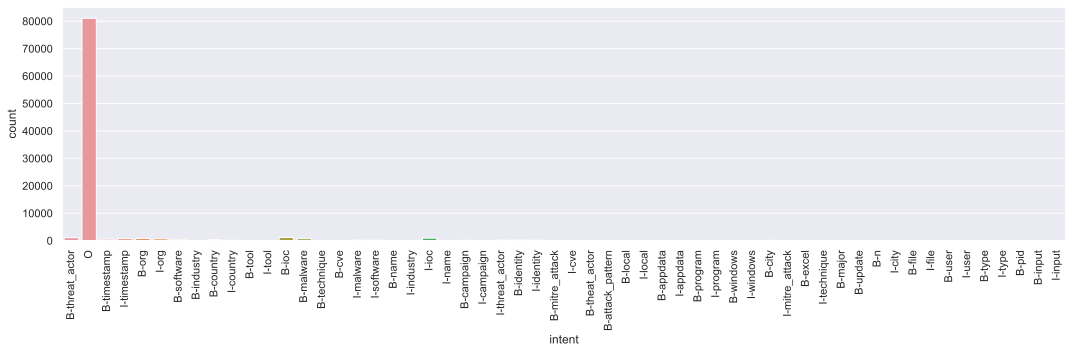

In [11]:
#Words distribution across Tags
plt.figure(figsize=(15, 5))
ax = sns.countplot('intent', data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")
plt.tight_layout()
plt.show()

/Users/Alisa.Alenicheva/anaconda3/envs/physGenBert38/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


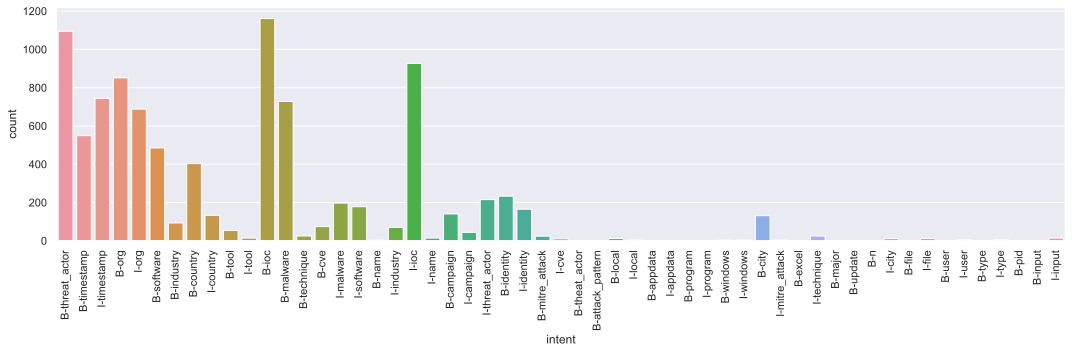

In [12]:
#Words distribution across Tags without O tag
plt.figure(figsize=(15, 5))
ax = sns.countplot('intent', data=data.loc[data['intent'] != 'O'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")
plt.tight_layout()
plt.show()

## Prepare dataset

In [22]:
# A class to retrieve the sentences from the dataset
class getsentence(object):
    
    def __init__(self, data):
        self.n_sent = 1.0
        self.data = data
        self.empty = False
        agg_func = lambda s: [(w,  t) for w,  t in zip(s["text"].values.tolist(),
                                                           
                                                           s["intent"].values.tolist())]
        self.grouped = self.data.groupby("SentNumOverall").apply(agg_func)
        self.sentences = [s for s in self.grouped]

In [23]:
getter = getsentence(data)
sentences = getter.sentences

In [24]:
def feature_map(word):
  def preprocess_words(x):

    x = x.lower()
    x = '_'.join(x.split(' ')[:2])
    x = '_'.join(x.split('-')[:2])
    return x
  
  word = preprocess_words(word)
  
  try:
    return model.wv[word]
  except KeyError:
    return np.zeros(100,)

In [25]:
words = [feature_map(w) for w in data["text"].values.tolist()]
tags = data["intent"].values.tolist()

## Cross Validation

In [40]:
pred = cross_val_predict(RandomForestClassifier(n_estimators=20),X=words, y=tags, cv=5)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


In [41]:
from sklearn.metrics import classification_report
report = classification_report(y_pred=pred, y_true=tags)
print(report)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                  precision    recall  f1-score   support

       B-appdata       0.00      0.00      0.00         1
B-attack_pattern       0.00      0.00      0.00         1
      B-campaign       0.95      0.96      0.95       140
          B-city       0.91      0.72      0.80       131
       B-country       0.67      0.60      0.63       403
           B-cve       0.00      0.00      0.00        74
         B-excel       0.00      0.00      0.00         1
          B-file       0.00      0.00      0.00         2
      B-identity       0.77      0.39      0.52       233
      B-industry       0.38      0.16      0.23        93
         B-input       0.00      0.00      0.00         1
           B-ioc       0.63      0.12      0.21      1161
         B-local       0.00      0.00      0.00        12
         B-major       0.00      0.00      0.00         1
       B-malware       0.84      0.29      0.43       728
  B-mitre_attack       0.50      0.08      0.14        24
             

## Training

In [27]:
import joblib

rf = RandomForestClassifier(n_estimators=20)
rf.fit(words,tags)

# save
joblib.dump(rf, os.path.join(LOG_PATH,"random_forest.joblib"))

['../models/W2Vec_100_RF_20/random_forest.joblib']

# Evaluation

In [28]:
TEST_DATA_PATH = '../data/raw/'
YEAR = 2013
FILENAME = 'FTA 1008 - Darkseoul-Jokra Analysis and Recovery.pdf.txt'

In [31]:
test_docs = []
import os
sent_num_dataset=0
with open(os.path.join(TEST_DATA_PATH, str(YEAR), FILENAME)) as f:
    docname = str(YEAR)+'/'+FILENAME
    data = []
    for para in f.read().strip().split('\n\n'):
      para = ' '.join(para.strip().replace("\n", " ").split())
      if para!='':
        data.extend(sent_tokenize(para))
    rows = [{'DocName':docname, 'SentNum':i, 'SentNumOverall':i+sent_num_dataset,'Sentence':sent} for i, sent in enumerate(data)]
    test_docs+=rows
    sent_num_dataset+=len(data)

In [32]:
test_docs_df = pd.DataFrame(test_docs)

## Load models

In [33]:
from gensim.models import Word2Vec
model = Word2Vec.load(os.path.join(LOG_PATH,"word2vec.model_100"))

rf = joblib.load( os.path.join(LOG_PATH,"random_forest.joblib"))

In [80]:
def annotate_text(data):
    
  from nltk.chunk import conlltags2tree
  from nltk import pos_tag
  from nltk.tree import Tree
  annotation = []
  
  for test_sentence in data['Sentence']:
    prev_label='O'
    
    def preprocess_words(x):

        x = x.lower()
        x = '_'.join(x.split(' ')[:2])
        x = '_'.join(x.split('-')[:2])
        return x
    def feature_map(word):
      

      word = preprocess_words(word)

      try:
        return model.wv[word]
      except KeyError:
        return np.zeros(100,)
    
    tokenized_sentence = [feature_map(x) for x in test_sentence.split(' ')]
    
    tags = rf.predict(tokenized_sentence)
    tokens = [preprocess_words(x) for x in test_sentence.split(' ')]
    pos_tags = [pos for token, pos in pos_tag(tokens)]
    # convert the BIO / IOB tags to tree
    conlltags = [(token, pos, tg) for token, pos, tg in zip(tokens, pos_tags, tags)]
    ne_tree = conlltags2tree(conlltags)
    # parse the tree to get our original text
    original_text = []
    for subtree in ne_tree:
        # checking for 'O' tags
        if type(subtree) == Tree:
            original_label = subtree.label()
            original_string = " ".join([token for token, pos  in subtree.leaves()])
            if (original_string!='[CLS]' and original_string!='[SEP]'):
              if original_label==prev_label:
                original_text.append(original_string)
              else:
                original_text.append('<'+original_label.upper()+'>'+original_string)
              prev_label = original_label
        elif type(subtree)==tuple:
          if (subtree[0]!='[CLS]' and subtree[0]!='[SEP]'):
            if prev_label!='O':
              original_text[-1]+='</'+original_label.upper()+'>'
              prev_label='O'
            original_text.append(subtree[0])
    annotation+=[' '.join(original_text)]
  return '\n'.join(annotation)

In [81]:
text_an = annotate_text(test_docs_df)

In [84]:
with open(os.path.join(LOG_PATH, 'test_'+str(FILENAME)),'w') as f:
    f.write(text_an)